### Assignment 7.5
### Prepared By: Woon Kim
### UNI: wk2371
### Course: ACTU 5841
### Date: March 20 2022

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng

from sklearn.neighbors import KNeighborsClassifier

In [3]:
X1 = np.arange(0,11,1)
X2 = np.arange(0,11,1)

In [4]:
min(X1+np.sin(X2)-5)
max(X1+np.sin(X2)-5)

4.4559788891106304

In [5]:
x1, x2 = grid = np.meshgrid(np.arange(0, 11), np.arange(-5, 6)) 

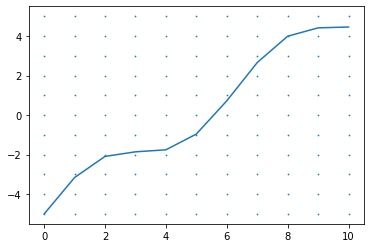

In [6]:
plt.scatter(x1, x2, s=0.5)
plt.plot(X1+np.sin(X2)-5)

plt.show()

In [9]:
sin = []
for i in np.arange(0,11,1):
    sin.append(X1+np.sin(X2)-5)    

In [10]:
sin = np.array(sin)
xx2 = np.reshape(np.stack((x1.ravel(),x2.ravel(),sin.ravel().ravel()),axis=1),(-1,3))

In [11]:
xx_df = pd.DataFrame(xx2, columns=['X1', 'X2', 'SIN_X2'])
xx_df['Good'] = np.where((xx_df['X2'] >= xx_df['SIN_X2']), 'Y', 'N')
xx_df['Y=1'] = np.where((xx_df['Good'] == "Y"), 0.8+(xx_df['X1']+xx_df['X2'])*0.01, 1-0.8+(xx_df['X1']+xx_df['X2'])*0.01)
xx_df['Y=2'] = np.where((xx_df['Good'] == "N"), 0.8+(xx_df['X1']+xx_df['X2'])*0.01, 1-0.8+(xx_df['X1']+xx_df['X2'])*0.01)
xx_df['yhat'] = np.where((xx_df['Y=1'] > xx_df['Y=2']), 1,2)
xx_df

,X1,X2,SIN_X2,Good,Y=1,Y=2,yhat
0,0.0,-5.0,-5.000000,Y,0.75,0.15,1
1,1.0,-5.0,-3.158529,N,0.16,0.76,2
2,2.0,-5.0,-2.090703,N,0.17,0.77,2
3,3.0,-5.0,-1.858880,N,0.18,0.78,2
4,4.0,-5.0,-1.756802,N,0.19,0.79,2
...,...,...,...,...,...,...,...
116,6.0,5.0,0.720585,Y,0.91,0.31,1
117,7.0,5.0,2.656987,Y,0.92,0.32,1
118,8.0,5.0,3.989358,Y,0.93,0.33,1
119,9.0,5.0,4.412118,Y,0.94,0.34,1


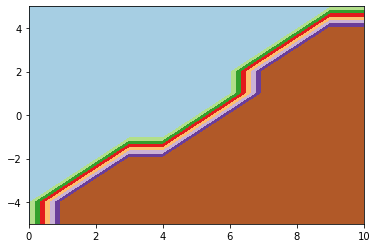

In [12]:
zz = xx_df['yhat']
zz = np.array(zz)
zz = zz.reshape(x1.shape)
from matplotlib import pyplot
pyplot.contourf(x1, x2, zz, cmap='Paired')

In [13]:
#Question 2
xx_df['argmax'] = np.where((xx_df['Y=1'] > xx_df['Y=2']), xx_df['Y=1'], xx_df['Y=2'])
Bayes_error = 1-np.sum(xx_df['argmax'])/len(xx_df['argmax'])
print(Bayes_error)

0.1499999999999999


In [14]:
#Question 3
import random
X1 = np.arange(0,11,0.2)
X2 = np.arange(0,11,0.2)

x1, x2 = grid = np.meshgrid(np.arange(0, 11, 0.2), np.arange(-5, 6, 0.2)) 
#Y_sample = random.choices(population=[[1], [2]], weights=[0.5, 0.5], k=100)

In [16]:
sin2 = []
for i in np.arange(0,11,0.2):
    sin2.append(X1+np.sin(X2)-5)    

In [17]:
sin2 = np.array(sin2)
xx3 = np.reshape(np.stack((x1.ravel(),x2.ravel(),sin2.ravel().ravel()),axis=1),(-1,3))

In [18]:
x3_df = pd.DataFrame(xx3, columns=['X1', 'X2', 'SIN_X2'])
x3_df['Good'] = np.where((x3_df['X2'] >= x3_df['SIN_X2']), 'Y', 'N')
x3_df['Y=1'] = np.where((x3_df['Good'] == "Y"), 0.8+(x3_df['X1']+x3_df['X2'])*0.01, 1-0.8+(x3_df['X1']+x3_df['X2'])*0.01)
x3_df['Y=2'] = np.where((x3_df['Good'] == "N"), 0.8+(x3_df['X1']+x3_df['X2'])*0.01, 1-0.8+(x3_df['X1']+x3_df['X2'])*0.01)
#x3_df['yhat'] = np.where((x3_df['Y=1'] > x3_df['Y=2']), 1,2)
x3_df

,X1,X2,SIN_X2,Good,Y=1,Y=2
0,0.0,-5.0,-5.000000,Y,0.750,0.150
1,0.2,-5.0,-4.601331,N,0.152,0.752
2,0.4,-5.0,-4.210582,N,0.154,0.754
3,0.6,-5.0,-3.835358,N,0.156,0.756
4,0.8,-5.0,-3.482644,N,0.158,0.758
...,...,...,...,...,...,...
3020,10.0,5.8,4.455979,Y,0.958,0.358
3021,10.2,5.8,4.500125,Y,0.960,0.360
3022,10.4,5.8,4.572174,Y,0.962,0.362
3023,10.6,5.8,4.677225,Y,0.964,0.364


In [19]:
Y_sample = []
for i in np.arange(0,len(x3_df['Y=1'])):
    Y_sample.append(random.choices(population=(1, 2), weights=[x3_df.iloc[i,4], x3_df.iloc[i,5]])) 
    
Y_sample2 = []
for i in np.arange(0,len(Y_sample)):
    Y_sample2.append(Y_sample[i][0])

In [20]:
x3_df['Y_sample'] = Y_sample2
x3_df

,X1,X2,SIN_X2,Good,Y=1,Y=2,Y_sample
0,0.0,-5.0,-5.000000,Y,0.750,0.150,1
1,0.2,-5.0,-4.601331,N,0.152,0.752,2
2,0.4,-5.0,-4.210582,N,0.154,0.754,2
3,0.6,-5.0,-3.835358,N,0.156,0.756,1
4,0.8,-5.0,-3.482644,N,0.158,0.758,2
...,...,...,...,...,...,...,...
3020,10.0,5.8,4.455979,Y,0.958,0.358,2
3021,10.2,5.8,4.500125,Y,0.960,0.360,2
3022,10.4,5.8,4.572174,Y,0.962,0.362,1
3023,10.6,5.8,4.677225,Y,0.964,0.364,2


In [21]:
X = np.hstack((x1.ravel().reshape(-1,1), x2.ravel().reshape(-1,1))) 
y = x3_df['Y_sample']

clas = KNeighborsClassifier(n_neighbors = 5).fit(X,y)
y_hat2 = clas.predict(X)

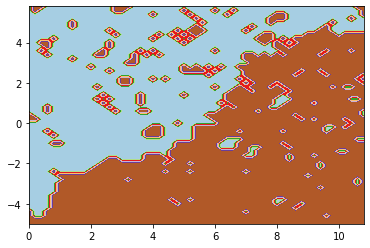

In [22]:
zz2 = y_hat2
zz2 = zz2.reshape(x1.shape)
from matplotlib import pyplot
pyplot.contourf(x1, x2, zz2, cmap='Paired')

In [23]:
#Question 4
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)
error = []

df = pd.DataFrame(list(zip(x3_df['X1'], x3_df['X2'], x3_df['Y_sample'])),
                  columns = ['x1', 'x2', 'y'])
    
for train, test in kf.split(df):
    X_train = df.iloc[train].loc[:, df.columns != 'y']
    X_train = X_train.squeeze()
    X_test = df.iloc[test].loc[:, df.columns != 'y']
    y_train = df.iloc[train].loc[:,'y']
    y_test = df.iloc[test].loc[:,'y']

    clas2 = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
    y_hat3 = clas2.predict(X_test)

    error.append(np.mean(y_hat3 != y_test))

kf_error = (1/5) * np.sum(error)

In [24]:
error

[0.30413223140495865,
 0.2809917355371901,
 0.2909090909090909,
 0.2628099173553719,
 0.3256198347107438]

In [25]:
kf_error

0.2928925619834711